In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("D:\#DATA Science\Machine Learning\Algorithms\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
df.shape

(200, 5)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [25]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [26]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### EDA
#### Distribution and Correlation

In [32]:
males_age = df[df["Gender"] == "Male"]["Age"]
females_age = df[df["Gender"] == "Female"]["Age"]
print(len(males_age), len(females_age))


88 112


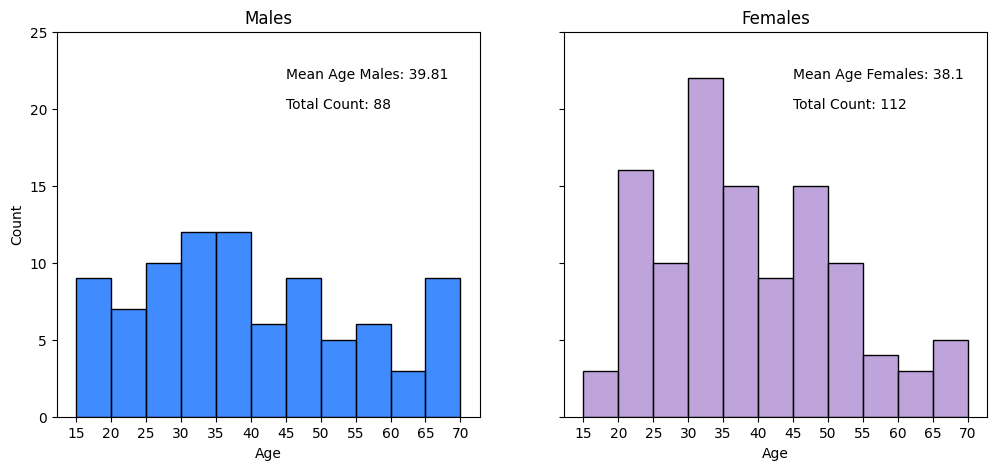

In [52]:
import seaborn as sns

bins_of_ages = range(15, 75, 5)

# Create a subplot with two axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot histogram for males
sns.histplot(males_age, bins=bins_of_ages, kde=False, color='#0066ff', ax=ax1)
ax1.set_xticks(bins_of_ages)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45,20, "Total Count: {}".format(len(males_age)))
ax1.text(45,22, "Mean Age Males: {}".format(round(males_age.mean(),2)))

# Plot histogram for females
sns.histplot(females_age, bins=bins_of_ages, kde=False, color='#aa85cf', ax=ax2)
ax2.set_xticks(bins_of_ages)
ax2.set_ylim(top=25)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45,20, "Total Count: {}".format(len(females_age)))
ax2.text(45,22, "Mean Age Females: {}".format(round(females_age.mean(),2)))

plt.show()


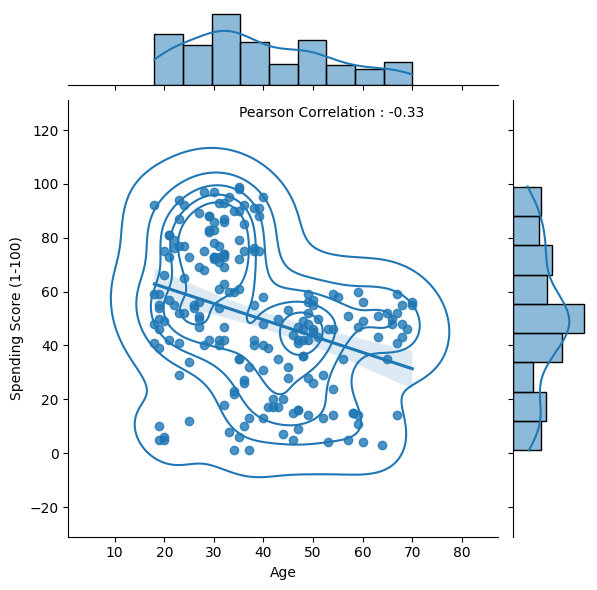

In [60]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df["Age"], df["Spending Score (1-100)"])
joint_plot = (sns.jointplot(data=df, x = 'Age', y = "Spending Score (1-100)", kind='reg')).plot_joint(sns.kdeplot, zorder=0, n_levels=6)
plt.text(35,125, "Pearson Correlation : {}".format(round(corr,2)))
plt.show()

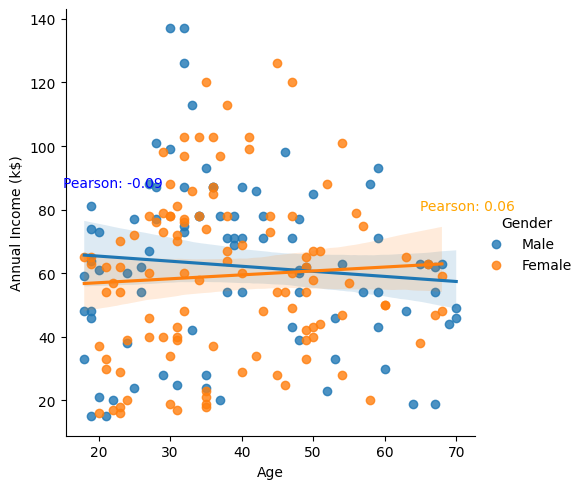

In [66]:
males_income = df[df['Gender']=='Male']['Annual Income (k$)'] # subset with males income
females_income = df[df['Gender']=='Female']['Annual Income (k$)'] # subset with females income
# calculating Pearson's correlations
corr1, _ = pearsonr(males_age.values, males_income.values)
corr2, _ = pearsonr(females_age.values, females_income.values)

sns.lmplot(data=df, x = 'Age', y = "Annual Income (k$)" ,hue='Gender')
plt.text(15,87, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(65,80, 'Pearson: {:.2f}'.format(corr2), color='orange')

plt.show()

### Clustering

In [104]:
from sklearn.cluster import KMeans 
X_numerics = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\

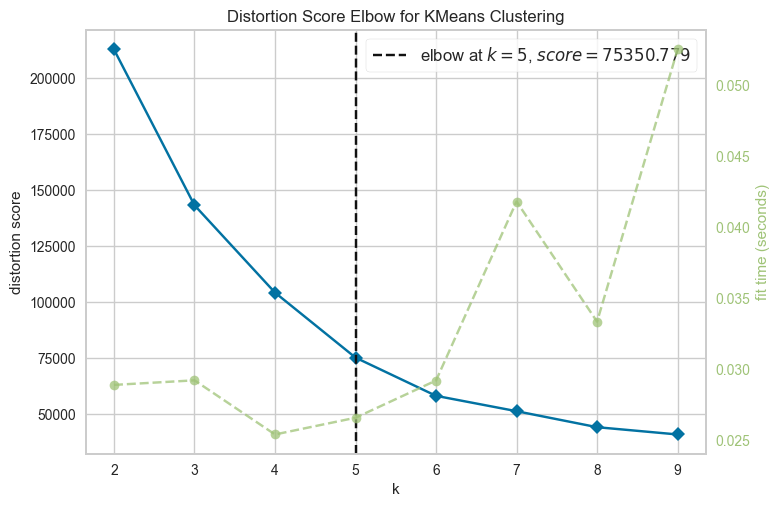

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [105]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=41)
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X_numerics)
visualizer.show()

In [106]:
km_5 = KMeans(n_clusters=5, init='k-means++')
k_means = km_5.fit(X_numerics)

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [107]:
k_pred = k_means.predict(X_numerics)

In [108]:
k_pred

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [127]:
X_numerics[k_pred == 0,1]

array([15, 16, 17, 18, 19, 19, 20, 20, 21, 23, 24, 25, 28, 28, 29, 30, 33,
       33, 34, 37, 38, 39, 39], dtype=int64)

(0.0, 100.0)

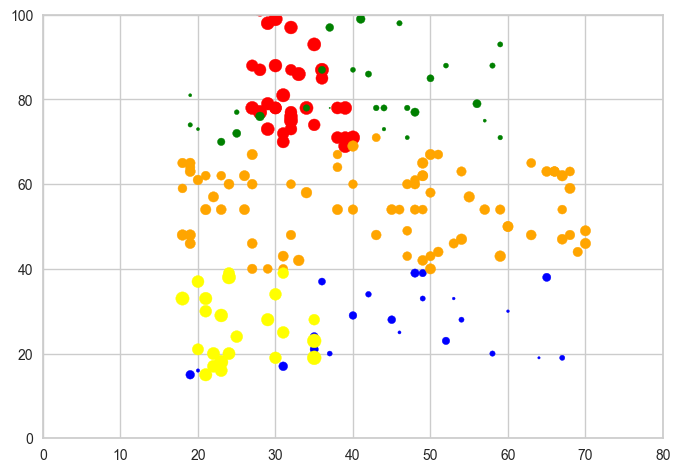

In [132]:
plt.scatter(X_numerics[k_pred == 0, 0],X_numerics[k_pred == 0, 1],X_numerics[k_pred == 0, 2], color = 'blue')
plt.scatter(X_numerics[k_pred == 1, 0],X_numerics[k_pred == 1, 1],X_numerics[k_pred == 1, 2], color = 'red')
plt.scatter(X_numerics[k_pred == 2, 0],X_numerics[k_pred == 2, 1],X_numerics[k_pred == 2, 2], color = 'green')
plt.scatter(X_numerics[k_pred == 3, 0],X_numerics[k_pred == 3, 1], X_numerics[k_pred == 3, 2],color = 'orange')
plt.scatter(X_numerics[k_pred == 4, 0],X_numerics[k_pred == 4, 1], X_numerics[k_pred == 4, 2],color = 'yellow')
plt.xlim(0,80)
plt.ylim(0,100)

In [133]:
import plotly.express as px
import plotly.graph_objects as go

df = pd.DataFrame({'X0': X_numerics[:, 0], 'X1': X_numerics[:, 1], 'X2': X_numerics[:, 2], 'Cluster': k_pred})

colors = ['blue', 'red', 'green', 'orange', 'yellow']

fig = px.scatter_3d(df, x='X0', y='X1', z='X2', color='Cluster', color_discrete_sequence=colors)

fig.update_layout(scene=dict(xaxis=dict(range=[0, 80]), yaxis=dict(range=[0, 100])))

fig.show()
